# Assignment 1: Building a Better Contact Sheet

---

This is the assignment 1 of the python PIL course.

This code generates different intensity for diffrent channel(r,g,b)


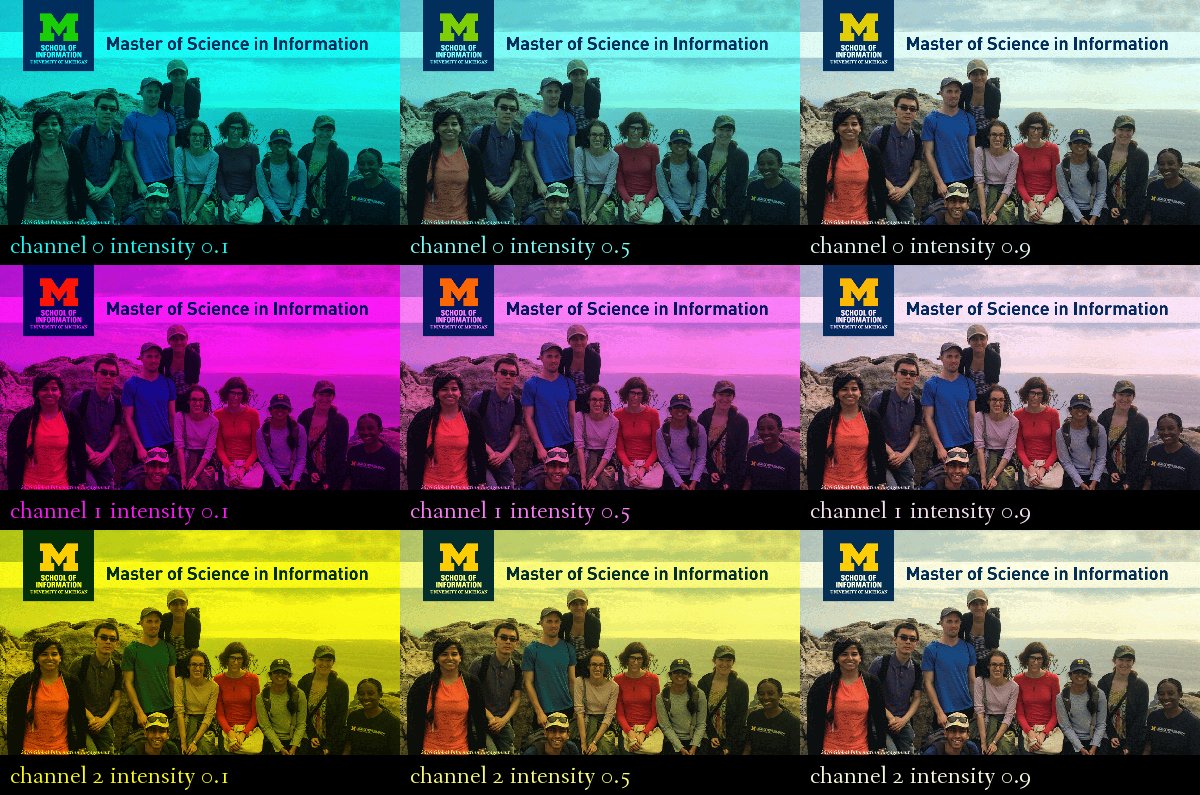

In [1]:
import PIL
from PIL import Image,ImageDraw,ImageFont

pics = []
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')
fnt = ImageFont.truetype('readonly/fanwood-webfont.ttf', 25)

for u in ["r","g","b"]:
    for i in (0.1,0.5,0.9):
        if u == "r":
            r, g, b = image.split()
            r = r.point(lambda x: x * i)
            out = Image.merge('RGB', (r, g, b))
            out = out.resize((int(out.width / 2), (int(out.height / 2))))
            rect = Image.new('RGB', (out.width, 40), color = (0, 0, 0))
            d = ImageDraw.Draw(rect)
            d.text((10, 10), 'channel 0 intensity {}'.format(i), font = fnt, fill = out.getpixel((0, 50)))
            sheet = PIL.Image.new(out.mode, (out.width, out.height + rect.height))
            sheet.paste(rect, (0, out.height))
            sheet.paste(out, (0, 0))
            pics.append(sheet)
        if u == "g":
            r, g, b = image.split()
            g = g.point(lambda x: x * i)
            out = Image.merge('RGB', (r, g, b))
            out = out.resize((int(out.width / 2), (int(out.height / 2))))
            rect = Image.new('RGB', (out.width, 40), color = (0, 0, 0))
            d = ImageDraw.Draw(rect)
            d.text((10, 10), 'channel 1 intensity {}'.format(i), font = fnt, fill = out.getpixel((0, 50)))
            sheet = PIL.Image.new(out.mode, (out.width, out.height + rect.height))
            sheet.paste(rect, (0, out.height))
            sheet.paste(out, (0, 0))       
            pics.append(sheet)
        if u == "b":
            r, g, b = image.split()
            b = b.point(lambda x: x * i)
            out = Image.merge('RGB', (r, g, b))
            out = out.resize((int(out.width / 2), (int(out.height / 2))))
            rect = Image.new('RGB', (out.width, 40), color = (0, 0, 0))
            d = ImageDraw.Draw(rect)
            d.text((10, 10), 'channel 2 intensity {}'.format(i), font = fnt, fill = out.getpixel((0, 50)))
            sheet = PIL.Image.new(out.mode, (out.width, out.height + rect.height))
            sheet.paste(rect, (0, out.height))
            sheet.paste(out, (0, 0))
            pics.append(sheet)

first_image = pics[0]

contact_sheet = PIL.Image.new(first_image.mode, (first_image.width * 3, first_image.height * 3))
x = 0
y = 0

for image in pics:
    contact_sheet.paste(image, (x, y))
    if x + first_image.width == contact_sheet.width:
        x = 0
        y = y + first_image.height 
    else:
        x = x + first_image.width

display(contact_sheet)

